# Análisis - Diagnóstico y Estadísticas

Se mostrarán las funciones que dispone NILMTK para realizar un diagnóstico rápido del dataset. Así también se disponen de algunas funciones para obtener datos estadísticos basados en el uso y consumo de energía de los elementos.

Librerías y otros ajustes:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet, TimeFrame
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

deps = DataSet('C:/data/DEPS.h5')
elec=deps.buildings[1].elec # Todos los medidores
labels = pd.DataFrame({'Instances': list(range(1,11)),
                       'Meters': ['Main_RST', 'Main_R', 'Main_S', 'Main_T', 'Lights_1','Lights_2', 'HVAC_1', 'HVAC_2', 'HVAC_4', 'Rack']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x] 
#etiquetas eje x en algunos graficos
days = ['2020-02-24 00:00:00+01:00', '2020-02-25 00:00:00+01:00', '2020-02-26 00:00:00+01:00',
        '2020-02-27 00:00:00+01:00', '2020-02-28 00:00:00+01:00', '2020-02-29 00:00:00+01:00',
        '2020-03-01 00:00:00+01:00', '2020-03-02 00:00:00+01:00', '2020-03-03 00:00:00+01:00', 
        '2020-03-04 00:00:00+01:00', '2020-03-05 00:00:00+01:00', '2020-03-06 00:00:00+01:00', '2020-03-07 00:00:00+01:00']

colors_1 = ['tab:red','tab:brown','tab:gray','tab:pink','tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']
colors_2 = [colors_1[0]]+colors_1[4:]

### Gráficos de datos de potencia

Graficar todos los datos de potencia

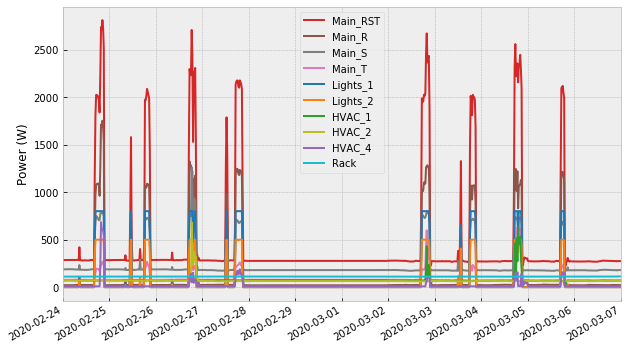

In [2]:
rcParams['figure.figsize'] = (10, 6)

ax=elec.plot()
#colores
c=0
for col in colors_1:
    ax.get_lines()[c].set_color(col)
    c+=1
#etiquetas
ax.legend(list(Meters.values()))
ax.set(xticks=days)
#guarda gráfico
plt.savefig('C:/data/images/2.4_Plot_all_meters.svg', bbox_inches='tight', transparent=True)
pass

Semana 1, Main_RST + Devices

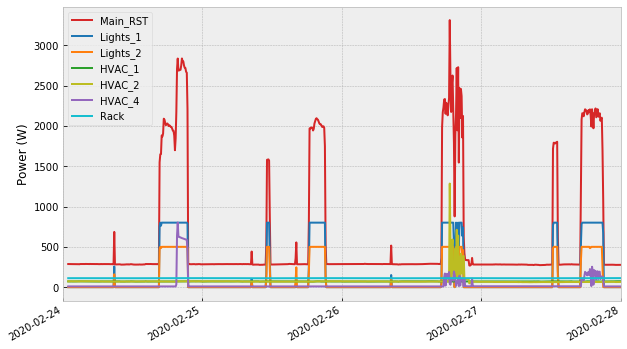

In [3]:
rcParams['figure.figsize'] = (10, 6)

tf1=TimeFrame(start='2020-02-24', end='2020-02-28')
ax=elec.select(instance=[1,5,6,7,8,9,10]).plot(timeframe=tf1)
#colores
c=0
for col in colors_2:    
    ax.get_lines()[c].set_color(col)
    c+=1    
#etiquetas
ax.legend([list(Meters.values())[0]]+list(Meters.values())[4:10])
ax.set(xticks=days[:5])
#guarda gráfico
plt.savefig('C:/data/images/2.5_Plot_all_meters_week1.svg', bbox_inches='tight', transparent=True)
pass

Semana 2, Main_RST + Devices

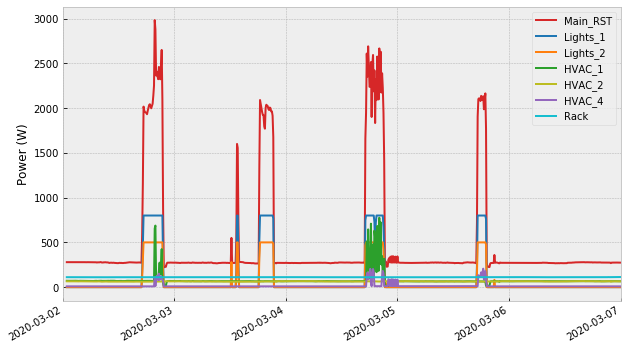

In [4]:
rcParams['figure.figsize'] = (10, 6)

tf2=TimeFrame(start='2020-03-02', end='2020-03-07')
ax=elec.select(instance=[1,5,6,7,8,9,10]).plot(timeframe=tf2)
#colores
c=0
for col in colors_2:    
    ax.get_lines()[c].set_color(col)
    c+=1  
#etiquetas
ax.legend([list(Meters.values())[0]]+list(Meters.values())[4:10])
ax.set(xticks=days[7:])
#guarda gráfico
plt.savefig('C:/data/images/2.6_Plot_all_meters_week2.svg', bbox_inches='tight', transparent=True)
pass

Relación entre la señal agregada y la suma de las mediciones individuales de los dispositivos mediante una gráfica de área:

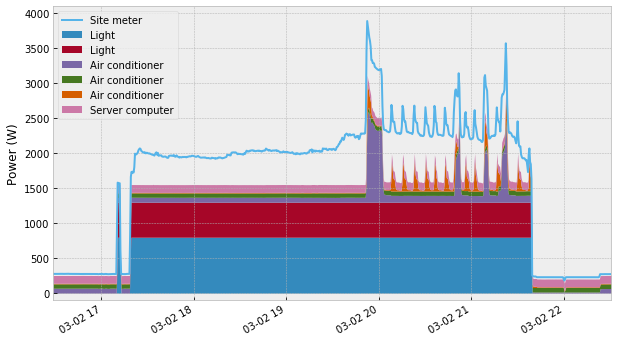

In [5]:
#ejemplo
from nilmtk import TimeFrame
t=TimeFrame(start='2020-03-02 16:29:00+01:00', end='2020-03-02 22:31:00+01:00')
elec.select(instance=[5,6,7,8,9,10]).plot(kind='area',timeframe=t)
ax=elec[1].plot(timeframe=t)

ax.set(ylim=(-100,4100))
pass

In [6]:
colors_2[:6]

['tab:red', 'tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:purple']

Otra manera:

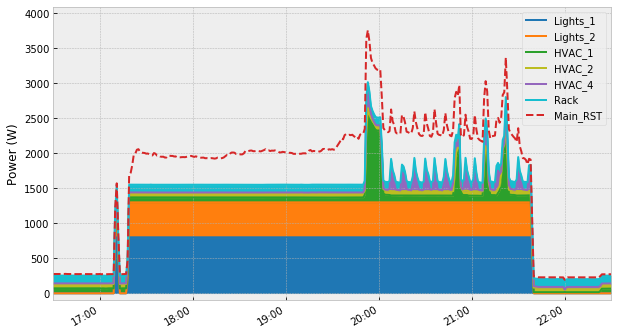

In [7]:
rcParams['figure.figsize'] = (10, 6)

t0 = '2020-03-02 16:30:00+01:00'
t1 = '2020-03-02 22:30:00+01:00'
df_1 = elec.select(instance=[5,6,7,8,9,10]).dataframe_of_meters(ac_type='active', sample_period=60)[t0:t1]
df_2 = elec[1].power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

ax1 = df_1.plot(kind='area', color=colors_2[1:])
df_2.plot(ax=ax1, color=colors_1[0], ls='--')
 
#etiquetas
ax1.legend(list(Meters.values())[4:10]+[list(Meters.values())[0]])
ax1.set_xticklabels(['17:00','18:00','19:00','20:00','21:00','22:00'])
ax1.set(ylim=(-100,4100))
ax1.set(ylabel='Power (W)')
#guarda gráfico
plt.savefig('C:/data/images/2.7_Plot_all_meters_03march.svg', bbox_inches='tight', transparent=True)
pass

In [8]:
elec.select(instance=[5,6,7,8,9,10]).power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

Loading data for meter ElecMeterID(instance=10, building=1, dataset='DEPS')     
Done loading data all meters for this chunk.


2020-03-02 16:30:00+01:00    252.349670
2020-03-02 16:31:00+01:00    252.438492
2020-03-02 16:32:00+01:00    252.674500
2020-03-02 16:33:00+01:00    252.735168
2020-03-02 16:34:00+01:00    253.023956
                                ...    
2020-03-02 22:26:00+01:00    251.961914
2020-03-02 22:27:00+01:00    252.308014
2020-03-02 22:28:00+01:00    252.593170
2020-03-02 22:29:00+01:00    252.660995
2020-03-02 22:30:00+01:00    253.170059
Freq: 60S, Name: (power, active), Length: 361, dtype: float32

### Perfil de Voltaje

In [9]:
V_R=next(elec[2].load())['voltage']
V_S=next(elec[3].load())['voltage']
V_T=next(elec[4].load())['voltage']

In [10]:
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'Main_R':    [round(V_R.mean(),1), round(V_S.mean(),1), round(V_T.mean(),1)], #Voltaje R S T mean
     'Main_S':    [round(V_R.max(),1),  round(V_R.max(),1),  round(V_R.max(),1)],  #Voltaje R S T max
     'Main_T':    [round(V_R.min(),1),  round(V_R.min(),1),  round(V_R.min(),1)]}  #Voltaje R S T min
pd.DataFrame(d)

,Indicador,Main_R,Main_S,Main_T
0,Promedio,228.0,236.5,221.1
1,Máximo,229.2,236.5,221.1
2,Mínimo,226.3,236.5,221.1


Gráfico del perfil de voltaje

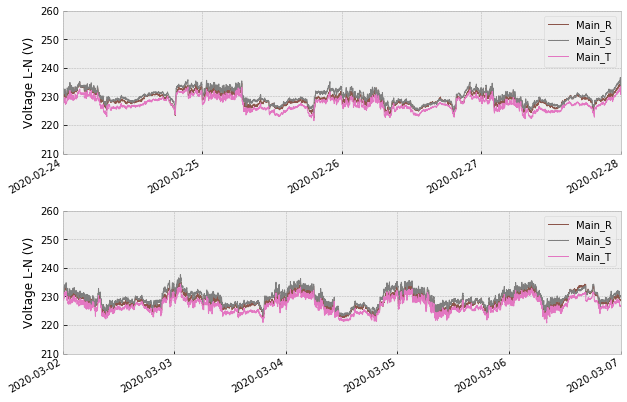

In [11]:
rcParams['figure.figsize'] = (10, 7)

#redimensina el gráfico para reducir tamaño
V_R=next(elec[2].load(sample_period=60))['voltage']
V_S=next(elec[3].load(sample_period=60))['voltage']
V_T=next(elec[4].load(sample_period=60))['voltage']

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'hspace': 0.4})

ta = '2020-02-24 00:00:00+01:00'
tb = '2020-02-28 00:00:00+01:00'
V_R[ta:tb].plot(ax=ax1, c='tab:brown', lw=1)
V_S[ta:tb].plot(ax=ax1, c='tab:gray', lw=1)
V_T[ta:tb].plot(ax=ax1, c='tab:pink', lw=1)

tc = '2020-03-02 00:00:00+01:00'
td = '2020-03-07 00:00:00+01:00'
V_R[tc:td].plot(ax=ax2, c='tab:brown', lw=1)
V_S[tc:td].plot(ax=ax2, c='tab:gray', lw=1)
V_T[tc:td].plot(ax=ax2, c='tab:pink', lw=1)

ax1.legend(list(Meters.values())[1:4], loc='upper right')
ax2.legend(list(Meters.values())[1:4], loc='upper right')
ax1.set(ylim=(210,260))
ax2.set(ylim=(210,260))
ax1.set(ylabel='Voltage L-N (V)')
ax2.set(ylabel='Voltage L-N (V)')

ax1.set(xticks=days[:5])
ax2.set(xticks=days[7:])

#guarda gráfico
plt.savefig('C:/data/images/2.8_voltage_profile.svg', bbox_inches='tight', transparent=True)
pass

### Datos faltantes

Los datos faltantes, huecos o gaps están determinados por los metadatos de cada tipo de medidor, específicamente en el ajuste del parámetro max_sample_period. Este valor indica el tiempo máximo que se tolera entre mediciones sin que se considere que el medidor está apagado

In [12]:
elec[1].good_sections(full_results=True).combined() #secciones buenas Main_RST

[TimeFrame(start='2020-02-24 00:00:00+01:00', end='2020-02-27 11:56:25+01:00', empty=False),
 TimeFrame(start='2020-02-27 11:56:40+01:00', end='2020-02-27 17:52:21+01:00', empty=False),
 TimeFrame(start='2020-02-27 17:52:36+01:00', end='2020-02-27 23:59:59+01:00', empty=False),
 TimeFrame(start='2020-03-02 00:00:00+01:00', end='2020-03-02 21:52:35+01:00', empty=False),
 TimeFrame(start='2020-03-02 21:52:49+01:00', end='2020-03-04 03:19:56+01:00', empty=False),
 TimeFrame(start='2020-03-04 03:20:10+01:00', end='2020-03-05 09:07:32+01:00', empty=False),
 TimeFrame(start='2020-03-05 09:07:46+01:00', end='2020-03-05 21:12:23+01:00', empty=False),
 TimeFrame(start='2020-03-05 21:12:37+01:00', end='2020-03-06 09:02:59+01:00', empty=False),
 TimeFrame(start='2020-03-06 09:03:14+01:00', end='2020-03-06 23:59:59+01:00', empty=False)]

Visualizar de manera gráfica los datos faltantes 

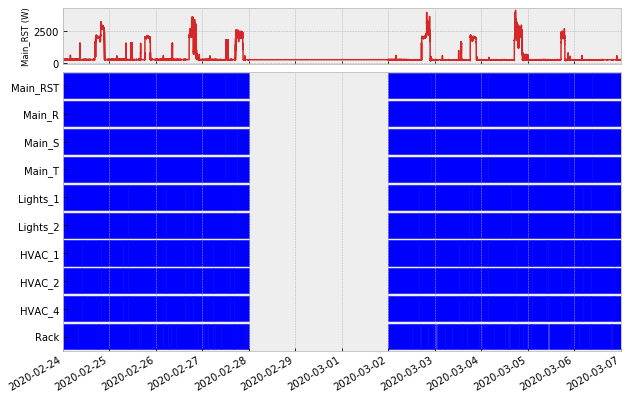

In [13]:
rcParams['figure.figsize'] = (10, 7)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios':[1,5]})

elec[1].power_series_all_data().plot(ax=ax1, c='tab:red', lw=1.5)
ax1.set_ylabel('Main_RST (W)', fontsize=8.5)
ax1.minorticks_off()

elec.plot_good_sections(ax=ax2)
ax2.set_yticklabels(reversed(list(Meters.values())))
ax2.grid(axis='y')
ax2.set(xticks=days)
l=['2020-02-24','2020-02-25','2020-02-26','2020-02-27','2020-02-28','2020-02-29','2020-03-01',
   '2020-03-02','2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-07']
ax2.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('C:/data/images/2.9_good_sections.svg', bbox_inches='tight', transparent=True)
pass

### Tasa de abandono y tiempo de funcionamiento

#### Tasa de abandono
Sin contar cuando el sistema no registra datos por sobre el tiempo máximo de muestreo, también se perciben perdidas de datos debido al propio sistema de adquisición. A esto se le llama abandono o dropout. La tasa de abandono (dropout rate) es un número entre 0 y 1 que especifica la proporción de muestras faltantes. Una tasa de abandono de 0 significa que no faltan muestras y un valor de 1 significaría que faltan todas las muestras (100%). 

#### Tiempo de funcionamiento
El tiempo de funcionamiento calculado estará condicionado al parámetro max_sample_period de cada medidor especificado en los metadatos. Si no se han registrado datos luego de ese tiempo, se considera el medidor como apagado.

In [14]:
a=[]; b=[]; c=[]
for meter, name in Meters.items():
    a.append(name)
    b.append(str(meter.uptime())) #tiempo de funcionamiento
    c.append(round(meter.dropout_rate()*100,1)) #tasa de abandono

a.append('Total')
b.append(str(elec.uptime()))
c.append(round(elec.dropout_rate()*100,1))
    
df=pd.DataFrame(data=[b,c], columns=a, index=['Uptime','Dropout Rate']).transpose()
df

Calculating dropout_rate for ElecMeterID(instance=10, building=1, dataset='DEPS') ...   lecMeterID(instance=5, building=1, dataset='DEPS') ...   

,Uptime,Dropout Rate
Main_RST,8 days 23:58:17,2.7
Main_R,8 days 23:58:17,2.7
Main_S,8 days 23:58:17,2.7
Main_T,8 days 23:58:17,2.7
Lights_1,8 days 23:57:10,4.3
Lights_2,8 days 23:57:10,4.3
HVAC_1,8 days 23:54:36,4.6
HVAC_2,8 days 23:54:36,4.6
HVAC_4,8 days 23:54:36,4.6
Rack,8 days 23:50:37,7.3


### Registro de actividad

Periodos de tiempo en que se registra una medición superior a un umbral definido (incluyendo peaks).

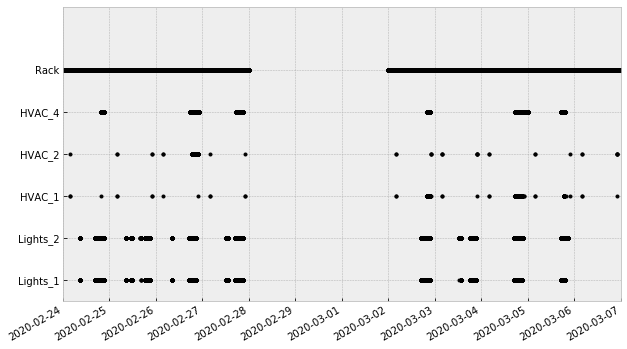

In [15]:
rcParams['figure.figsize'] = (10, 6)

Devices=elec.select(instance=[5,6,7,8,9,10]) #MeterGroup de dispositivos
ax=Devices.plot_when_on(on_power_threshold=80) #umbral de 80 W

#etiquetas
ax.set_yticklabels(list(Meters.values())[4:10])
ax.set(xticks=days)

#guarda gráfico
plt.savefig('C:/data/images/2.10_On_power1.pdf', bbox_inches='tight', transparent=True)
plt.savefig('C:/data/images/2.10_On_power1.png', bbox_inches='tight', transparent=True, dpi=1200)
#formatos savefig: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz, evitar guardar .svg por el tamaño del archivo (50Mb)
pass

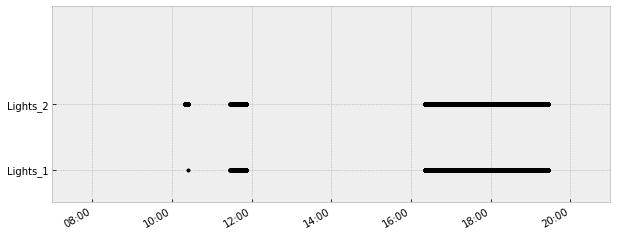

In [16]:
rcParams['figure.figsize'] = (10, 4)

Lights=elec.select(instance=[5,6])
ax=Lights.plot_when_on(on_power_threshold = 80)

#etiquetas
ax.set_yticklabels(list(Meters.values())[4:6])
ax.set_xlim('2020-03-03 08:00:00', '2020-03-03 22:00:00')
ax.set_xticklabels(['08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00'])

#guarda gráfico
plt.savefig('C:/data/images/2.11_On_power2.pdf', bbox_inches='tight')
plt.savefig('C:/data/images/2.10_On_power2.png', bbox_inches='tight', transparent=True, dpi=1200)
pass

Graficos de Actividad por dispositivo y por día

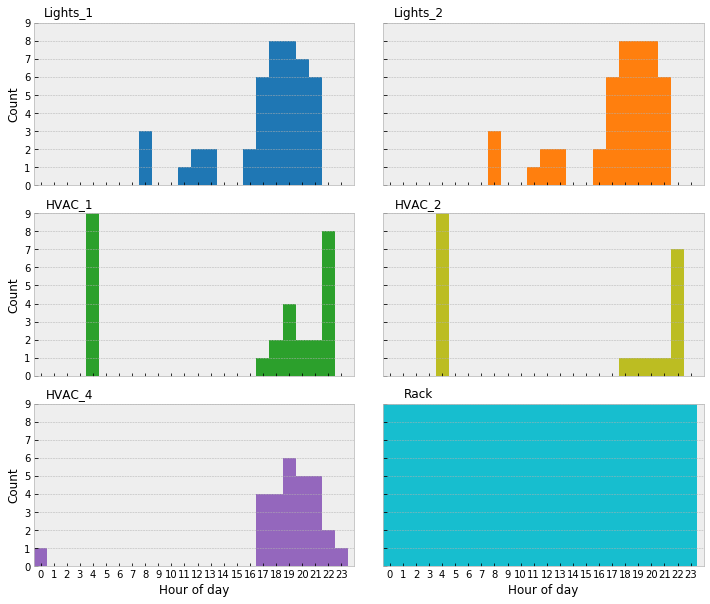

In [17]:
rcParams['figure.figsize'] = (12, 10)
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True,
                                                       gridspec_kw={'hspace': 0.17, 'wspace': 0.09})
m=4
for ax in fig.get_axes(): 
    list(Meters)[m].plot_activity_histogram(ax=ax, period='D', #periodo en días
                                            bin_duration='H', #duración en horas
                                            on_power_threshold=80,
                                            plot_kwargs={'color':colors_1[m]}) #umbral de 80    
    #labels
    ttl=ax.set_title(labels['Meters'][m], fontsize=12)
    ttl.set_position([.11, 1])
    m=m+1
    ax.grid(axis='x')

ax1.set(ylim=[0,9])
ax1.set(yticks=[0,1,2,3,4,5,6,7,8,9])
ax1.set(xticks=list(range(0,24)))
#labels
ax1.set(xlabel='')
ax2.set(xlabel='',ylabel='')
ax3.set(xlabel='')
ax4.set(xlabel='',ylabel='')
ax6.set(ylabel='')

#guarda gráfico
plt.savefig('C:/data/images/2.12_Activity_histogram.svg',bbox_inches='tight', transparent=True)
pass

Mapa de calor con las mediciones de potencia activa del medidor Main_RST 

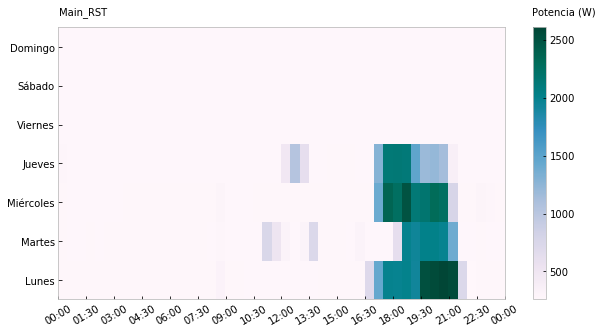

In [18]:
import numpy as np
import pandas as pd

d=elec[1].power_series_all_data(sample_period=60*30, resample_kwargs={'how': 'mean'}).to_frame()

d.fillna(0,inplace=True)
d.columns=['active']
d['weekday']=d.index.weekday
d['time']=d.index.time
matrix=d.groupby(['weekday','time']).active.mean().unstack().values
plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.pcolor(matrix,cmap='PuBuGn')
plt.xlim([0,48])
ax.set_xticks(np.arange(0,49,3))
ax.set_xticklabels(['00:00','01:30','03:00','04:30','06:00',
                    '07:30','09:00','10:30','12:00','13:30',
                    '15:00','16:30','18:00','19:30','21:00',
                    '22:30','00:00'],rotation=30)
ax.set_yticks(np.arange(0.5,7))
ax.set_yticklabels(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.colorbar()
ax.text(0.1, 7.4, 'Main_RST', ha='left', va='center')
ax.text(51, 7.4, 'Potencia (W)', ha='left', va='center') 

plt.savefig('C:/data/images/2.13_Use_power1.svg', bbox_inches='tight', transparent=True)
plt.show()

Zoom

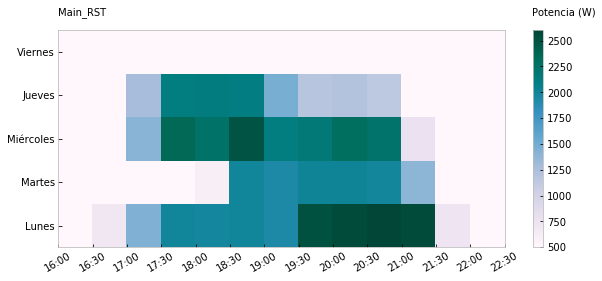

In [19]:
d=elec[1].power_series_all_data(sample_period=60*30, resample_kwargs={'how': 'mean'}).to_frame()
d.fillna(0,inplace=True)
d.columns=['active']
d['weekday']=d.index.weekday
d['time']=d.index.time
matrix=d.groupby(['weekday','time']).active.mean().unstack().values
plt.figure(figsize=(10, 4))
ax = plt.gca()
plt.pcolor(matrix[0:5],cmap='PuBuGn',vmin=500)
plt.xlim([32,45])
ax.set_xticks(np.arange(32,46,1))
ax.set_xticklabels(['16:00','16:30',
                    '17:00','17:30','18:00','18:30','19:00',
                    '19:30','20:00','20:30','21:00','21:30',
                    '22:00','22:30'],rotation=30)
ax.set_yticks(np.arange(0.5,5))
ax.set_yticklabels(['Lunes','Martes','Miércoles','Jueves','Viernes'])
plt.colorbar()
ax.text(32, 5.4, 'Main_RST', ha='left', va='center')
ax.text(45.8, 5.4, 'Potencia (W)', ha='left', va='center') 

#plt.savefig('C:/data/images/2.14_Use_power2.svg', bbox_inches='tight', transparent=True)
plt.show()

### Estadísticas de energía

Energía Total

In [20]:
elec[1].total_energy()

reactive    -82.434872
active      116.979099
dtype: float64

Energía por medidor

In [21]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','Total kWh']
df

10/10 ElecMeter(instance=10, building=1, dataset='DEPS', appliances=[Appliance(type='server computer', instance=1)])

,kWh Día,kWh Sem.,Total kWh
Main_RST,9.75,68.24,116.98
Main_R,3.28,22.95,39.34
Main_S,4.66,32.61,55.90
Main_T,1.81,12.67,21.72
Lights_1,2.02,14.17,24.29
Lights_2,1.27,8.87,15.21
HVAC_1,1.36,9.51,16.30
HVAC_2,1.26,8.83,15.13
HVAC_4,0.40,2.81,4.81
Rack,2.00,14.02,24.03


Proporción de energía submedida respecto a la medición agregada.

Se ha modificado la función original para poder graficar correctamente las etiquetas, dando paso a `proportion_of_energy_submetered_2` en donde se pueden especificar por separado el medidor principal y los submedidores.

In [22]:
Devices=elec.select(instance=[5,6,7,8,9,10]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='active')

Running MeterGroup.proportion_of_energy_submetered...


0.8529145118013295

Proporciones de energía de los submedidores y dispositivos

3/3 ElecMeter(instance=9, building=1, dataset='DEPS', appliances=[Appliance(type='air conditioner', instance=3)]))

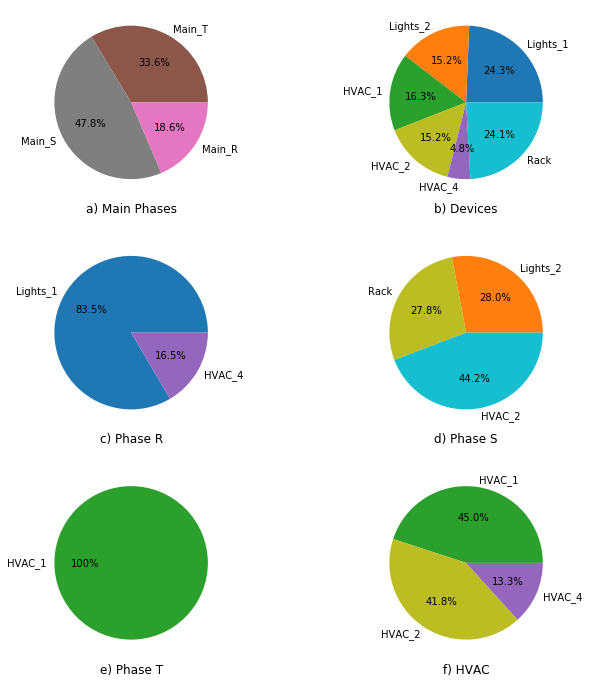

In [23]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2 ,gridspec_kw={'hspace': 0.2, 'wspace': 0.001})

MainsRST = elec.select(instance=[2,3,4]) #MeterGroup medidores R,S y T
Devices  = elec.select(instance=[5,6,7,8,9,10]) #MeterGroup de dispositivos

fraction_m = MainsRST.fraction_per_meter() #fracción de energía
fraction_d = Devices.fraction_per_meter() #fracción de energía
fraction_R = Devices.select(phase='R').fraction_per_meter()
fraction_S = Devices.select(phase='S').fraction_per_meter()
fraction_T = Devices.select(phase='T').fraction_per_meter()
fraction_HVAC = elec.select_using_appliances(type='air conditioner').fraction_per_meter()
labels_m = {'Main_R','Main_S','Main_T'}
labels_d = list(Meters.values())[4:10]

fraction_m.plot(autopct=lambda p:'{:.1f}%'.format(p), kind='pie',
                labels=labels_m, figsize=(12,12), ax=ax1, colors=['tab:brown','tab:gray','tab:pink'])
fraction_d.plot(autopct=lambda p:'{:.1f}%'.format(p), kind='pie',
                labels=labels_d, figsize=(12,12), ax=ax2, colors=colors_2[1:]) 
fraction_R.plot(autopct=lambda p:'{:.1f}%'.format(p), kind='pie',
                figsize=(12,12), ax=ax3, labels=(labels['Meters'][4],labels['Meters'][8]),
                colors=['tab:blue','tab:purple'])
fraction_S.plot(autopct=lambda p:'{:.1f}%'.format(p), kind='pie',
                figsize=(12,12), ax=ax4, labels=(labels['Meters'][5],labels['Meters'][9],labels['Meters'][7]),
                colors=['tab:orange','tab:olive','tab:cyan'])
fraction_T.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',
                figsize=(12,12), ax=ax5, labels=([labels['Meters'][6]]), colors=['tab:green'])
fraction_HVAC.plot(autopct=lambda p:'{:.1f}%'.format(p), kind='pie',
                figsize=(12,12), ax=ax6, labels=([labels['Meters'][6],labels['Meters'][7],labels['Meters'][8]]),
                colors=['tab:green','tab:olive','tab:purple'])

ax1.set(ylabel="")
ax1.set(xlabel="a) Main Phases")
ax2.set(ylabel="")
ax2.set(xlabel="b) Devices")
ax3.set(ylabel="")
ax3.set(xlabel="c) Phase R")
ax4.set(ylabel="")
ax4.set(xlabel="d) Phase S")
ax5.set(ylabel="")
ax5.set(xlabel="e) Phase T")
ax6.set(ylabel="")
ax6.set(xlabel="f) HVAC")
#guarda gráfico
plt.savefig('C:/data/images/2.15_Prop_energia.svg',bbox_inches='tight', transparent=True)
pass

### Síntesis del dataset

NILMTK ofrece una función que permite obtener un resumen de un MeterGroup en base a los medidores que contiene. Esta función engloba varias de las funciones que se han ejecutado anteriormente.

In [24]:
elec.describe_2(elec[1], elec.select(instance=[5,6,7,8,9,10]))

Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=4, building=1, dataset='DEPS')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=1, dataset='DEPS')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=1, dataset='DEPS')     
Done loading data all meters for this chunk.
Running MeterGroup.proportion_of_energy_submetered...
Calculating dropout_rate for ElecMeterID(instance=10, building=1, dataset='DEPS') ...   dropout_rate for ElecMeterID(instance=5, building=1, dataset='DEPS') ...   

total_n_meters                                                                               10
total_n_site_meters                                                                           1
correlation_of_sum_of_submeters_with_mains                                             0.999999
proportion_of_energy_submetered                                                        0.852915
dropout_rates_ignoring_gaps                   min=0.026775961139444755, mean=0.0404478738307...
mains_sample_period                                                                           1
submeter_sample_period                                                                        1
timeframe                                     start=2020-02-24 00:00:00+01:00, end=2020-03-0...
total_duration                                                                 11 days 23:59:59
mains_uptime                                                                    8 days 23:58:17
proportion_uptime                       

Calendario

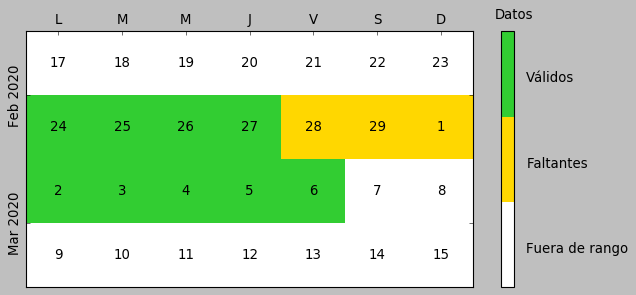

In [25]:
#https://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels
#https://likegeeks.com/seaborn-heatmap-tutorial/
#https://www.pythonprogramming.in/how-to-create-heatmap-calendar-using-numpy-and-matplotlib.html

import datetime as dt
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns

#dataset
num = 28
data=[0, 0, 0, 0, 0, 0, 0,  
      2, 2, 2, 2, 1, 1, 1, 
      2, 2, 2, 2, 2, 0, 0,
      0, 0, 0, 0, 0, 0, 0]

start = dt.datetime(2020, 2, 17)
cMap = ListedColormap(['white','gold','limegreen'])
def main(num, data, start):
    plt.style.use('classic')
    dates, data = generate_data(num, data, start)
    fig, ax = plt.subplots(figsize=(9, 4)) 
    calendar_heatmap(ax, dates, data)
    plt.savefig('C:/data/images/2.16_Calendario_1.pdf', bbox_inches='tight', transparent=True)    
    plt.show()  
def generate_data(num, data, start):
    dates = [start + dt.timedelta(days=i) for i in range(num)]
    return dates, data
def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1
    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar
def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar, interpolation='none', cmap=cMap) #'Set3'
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)   
    cbar = plt.colorbar(im)
    cbar.ax.get_yaxis().set_ticks([])
    for j, lab in enumerate(['Fuera de rango','Faltantes','Válidos']):
        cbar.ax.text(4, (18 * j + 8)/27.0, lab, ha='left', va='center',rotation=0)    
    cbar.ax.get_yaxis().labelpad = 0
    cbar.ax.set_ylabel('Datos', rotation=0, y=1.09, ha='center')
def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]
    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center') 
    ax.set(xticks=np.arange(7), xticklabels=['L', 'M', 'M', 'J', 'V', 'S', 'D'])
    ax.xaxis.tick_top()
def label_months(ax, dates, i, j, calendar):   
    yticks = [-0.5,0.5,2.5,3.5]
    labels = ['','Feb 2020', 'Mar 2020', '']
    ax.set(yticks=yticks)
    ax.set_yticklabels(labels, rotation=90)
    
main(num, data, start)